In [60]:
# imports
import torch
import matplotlib.pyplot as plt
from sportspose.dataset import SportsPoseDataset
from sportspose.plot_skeleton_3d import plot_skeleton_3d

In [61]:
### Update path to path where data is downloaded ###
datapath = "Path to your SportsPose folder"


In [62]:
# loading datasets
dataset_pervideo = SportsPoseDataset(
    data_dir=datapath,
    sample_level="video",
)
dataset_perframe = SportsPoseDataset(
    data_dir=datapath,
    sample_level="frame",
)

print(f"{len(dataset_pervideo)} videos were found for a total of {len(dataset_perframe)} frames!")

654 videos were found for a total of 176580 frames!


In [63]:
# loading example from dataset
sample = dataset_perframe[2000]

# load frame
frameRight = sample["video"]["image"]["right"][0]
# load 2D reprojection to "right" view
jointsRight = sample["joints_2d"]["right"][0]
# load 3D joints
joints3D = sample["joints_3d"]["data_points"][0]

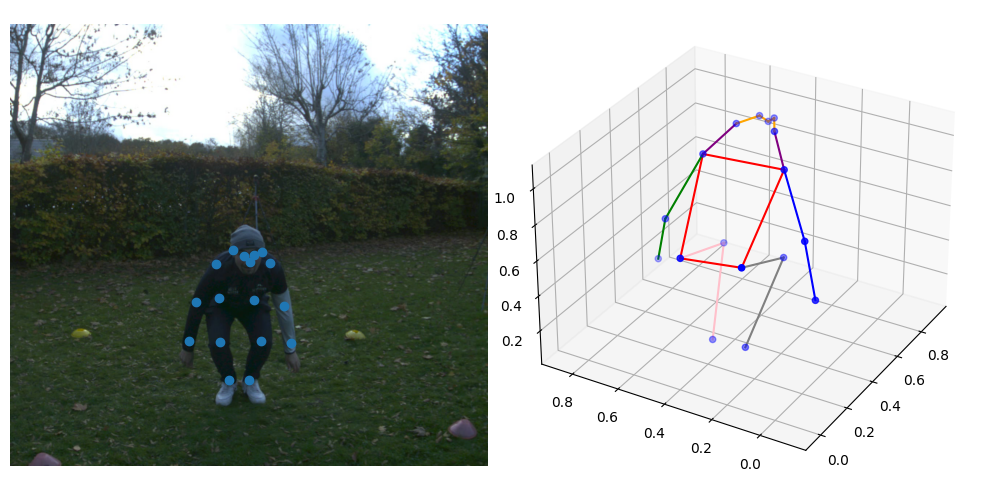

In [64]:
# plotting both 3d view and 2d reprojection
f = plt.figure(figsize=(10,5))
ax2d = f.add_subplot(1,2,1)
ax3d = f.add_subplot(1,2,2,projection="3d")
ax2d.imshow(frameRight)
ax2d.scatter(jointsRight[:, 0], jointsRight[:, 1])
ax2d.axis('off')
plot_skeleton_3d(joints3D, ax=ax3d)
plt.tight_layout()
plt.show()

In [90]:
# Example of picking sequences based off requirements
dataset_jump_indoor = SportsPoseDataset(
    data_dir=datapath,
    sample_level="video",
    seq_size=20,
    whitelist={
        "metadata": 
            {"tag":"indoors",
             "activity": "jump"},
    }
)
dataloader = torch.utils.data.DataLoader(dataset_jump_indoor, batch_size=2, shuffle=True)  

In [91]:
# Check shape of one sequence of the dataset
dataset_jump_indoor[0]["video"]["image"]["right"].shape

(20, 1936, 1216, 3)

In [92]:
# Check shape of one batch from the dataloader
sample = next(iter(dataloader))
sample["video"]["image"]["right"].shape

torch.Size([2, 20, 1936, 1216, 3])

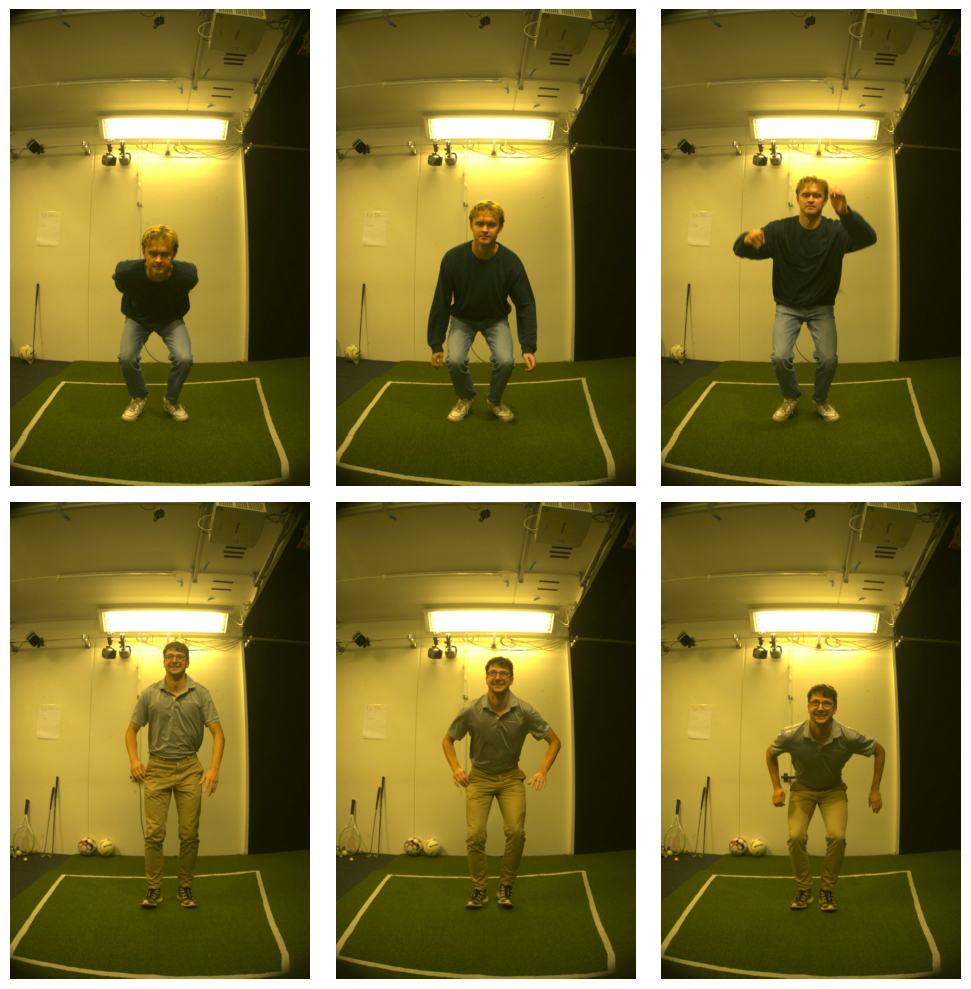

In [101]:
# Plot a few frames from the sample
f = plt.figure(figsize=(10,10))
for i, s in enumerate(sample["video"]["image"]["right"]):
    ax2d = f.add_subplot(2, 3, i*3+1)
    ax2d.imshow(s[0])
    ax2d.axis('off')
    ax2d = f.add_subplot(2, 3, i*3+2)
    ax2d.imshow(s[10])
    ax2d.axis('off')
    ax2d = f.add_subplot(2, 3, i*3+3)
    ax2d.imshow(s[19])
    ax2d.axis('off')
    
plt.tight_layout()
plt.show()